0 1
10 2
50 3
100 4


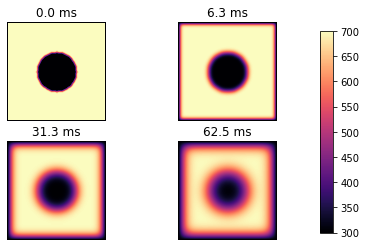

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# plate size, mm
w = h = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.1
# Thermal diffusivity of steel, mm2.s-1
D = 4.

Tcool, Thot = 300, 700

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = u0.copy()

# Initial conditions - circle of radius r centred at (cx,cy) (mm)
r, cx, cy = 2, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 > r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 101
# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure()
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('magma'), vmin=Tcool,vmax=Thot)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*1000))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

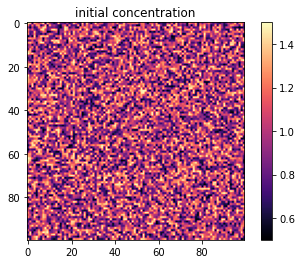

In [3]:
import numpy as np
#from numpy.random import *
import matplotlib.pyplot as plt

nx = 100 
ny = nx 
dx, dy = 0.5, 0.5 
c0 = 0.5
nsteps = 600# total number of time-steps


c = np.zeros((nx,ny)) # zero-clear
c_new = np.zeros((nx,ny)) # zero clear

c = c0 + np.random.rand(nx, ny)#*0.01


plt.imshow(c, cmap='magma')
plt.title('initial concentration')
plt.colorbar()
plt.show()

0 1
10 2
50 3
100 4


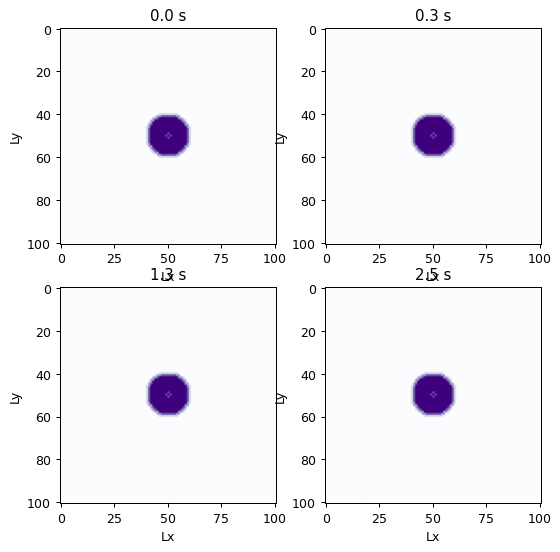

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# constante difusao
D = 1

# parametros da caixa
nx = 101
ny = 101
dx = 0.1
dy = 0.1

# passo de tempo
dt = dx ** 2 * dy ** 2 / (2 * D * (dx ** 2 + dy ** 2))
#dt = (dx * dy / D) * 0.1

# concentracao inicial e concentracao final 
u0 = np.zeros((nx, ny))
u = np.zeros((nx, ny))

#u = u0 + np.random.rand(nx,ny)*0.01

# Initial conditions - circle of radius r centred at (cx,cy) (mm)
r, dr, x, y = 0, 1, 5, 5
ri2, ro2 = r**2, (r+dr)**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-x)**2 + (j*dy-y)**2
        if ri2 < p2 < ro2:
            u0[i,j] = 2

def do_timestep(u0, u):
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx ** 2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy ** 2 )

    #u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 101


# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure(figsize=(8,7),dpi=90)
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u, cmap='Purples')
        plt.xlabel('Lx')
        plt.ylabel('Ly')
        ax.set_title('{:.1f} s'.format(m*dt*10))
fig.subplots_adjust(right=.8)
plt.show()

In [19]:
import numpy as np
import time
import matplotlib.pyplot as plt


D = 1
nx = 101
ny = 101
dx = 0.1
dy = 0.1
nt = 1001
dt = dx ** 2 * dy ** 2 / (2 * D * (dx ** 2 + dy ** 2))

def difusao(nt,nx,ny,D):
    
    u0 = np.zeros((nx,ny))
    u = np.zeros((nx, ny))
    x = np.zeros(nx)
    y = np.zeros(nx)


    # condicoes de contorno
    u[0:] = u[nx-1:] = 1
    u[0:] = u[ny-1:] = 1

    # condicoes iniciais

    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u[i,j] = u0[i,j] + D * dt * u0[i+1,j] - 2*u0[i,j] + u0[i-1,j] / (dx ** 2)
            + u0[i,j+1] - 2*u0[i,j] + u0[i,j-1]/(dy ** 2)

    for i in range(1,nx):
        x[i] = i*dx

    for j in range(1,ny):
        y[j] = j*dy

#        u0 = u.copy()
#    return u,u0



def plot_difusao(u,x,y,title):
    fig = plt.figure(figsize=(8,7),dpi=90)
    ax = fig.add_subplot()
    im = ax.imshow(u,cmap='PuRd')
    plt.plot(x,y,u)
    plt.xlabel('Lx')
    plt.ylabel('Ly')
    plt.ylim([0,100])
    plt.title(title)
    plt.show()

u,u0,x,y = difusao(nt,nx,ny,D)
plot_difusao(u,x,y,'Difusão - 2D')

TypeError: cannot unpack non-iterable NoneType object